<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#&quot;Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?&quot;" data-toc-modified-id="&quot;Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>"Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?"</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчет-концентрации-металлов-на-разных-этапах" data-toc-modified-id="Расчет-концентрации-металлов-на-разных-этапах-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчет концентрации металлов на разных этапах</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-на-test-и-train" data-toc-modified-id="Распределение-размеров-гранул-сырья-на-test-и-train-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья на test и train</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-металлов-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-металлов-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследование суммарной концентрации металлов на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-sMAPE" data-toc-modified-id="Функция-для-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта: восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Импорт библиотек

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import collections

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.dummy import DummyRegressor

## Подготовка данных

### Выгрузка данных

In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Проверка дубликатов

In [6]:
df_test.duplicated().sum()

0

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_full.duplicated().sum()

0

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Проверка значений

In [9]:
df_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [10]:
df_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [11]:
df_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Провер

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные осмотрели - отлично!

### Проверка эффективности обогащения

In [12]:
df_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                        'rougher.output.tail_au','rougher.output.recovery'], inplace=True)

In [13]:
concentrate_au_column = df_train['rougher.output.concentrate_au']
feed_au_column = df_train['rougher.input.feed_au']
tail_au_column = df_train['rougher.output.tail_au']
input_recovery = df_train['rougher.output.recovery']
calculated_recovery = (concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column 
                        / (concentrate_au_column - tail_au_column) * 100)
print('Эффективность обогащения чернового концентрата:')
print(calculated_recovery)
print('')
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Эффективность обогащения чернового концентрата:
0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

Абсолютная средняя ошибка = 1.0851689485498649e-14


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>MAE очень низкое, что говорит о совпадении расчетного значения rougher.output.recovery с данными из столбца

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Также подготовим данные по другим фреймам

In [14]:
good_df_train = df_train.dropna()
good_df_train.isna().mean()

date                      0.0
rougher.input.feed_au     0.0
rougher.input.feed_ag     0.0
rougher.input.feed_pb     0.0
rougher.input.feed_sol    0.0
                         ... 
final.output.recovery     0.0
final.output.tail_au      0.0
final.output.tail_ag      0.0
final.output.tail_pb      0.0
final.output.tail_sol     0.0
Length: 87, dtype: float64

In [15]:
good_df_test = df_test.dropna()
good_df_test.isna().mean()

date                                          0.0
rougher.input.feed_au                         0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0
rougher.state.floatbank10_a_air               0.0
rougher.state.floatbank10_a_level             0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_b_level             0.0
rougher.state.floatbank10_c_air               0.0
rougher.state.floatbank10_c_level             0.0
rougher.state.floatbank10_d_air               0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0


### "Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?"

In [16]:
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_columns = [i for i in df_train.columns if i not in df_test.columns]

for i in list_columns:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1

list_columns

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

In [17]:
step, '\n', type_step, '\n', data

(Counter({'rougher': 13,
          'primary_cleaner': 8,
          'secondary_cleaner': 4,
          'final': 9}),
 '\n',
 Counter({'calculation': 4, 'output': 30}),
 '\n',
 Counter({'sulfate_to_au_concentrate': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'au_pb_ratio': 1,
          'concentrate_au': 3,
          'concentrate_ag': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'recovery': 2,
          'tail_au': 4,
          'tail_ag': 4,
          'tail_pb': 4,
          'tail_sol': 4}))

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Из 34 пропущенных признаков 30 относятся к параметрам продукта, 4 - к расчетным характеристикам.

9 пропущенных признаков этапа final, 8 primary_cleaner, 9 rougher, 4 secondary_cleaner относятся к параметрам продукта.
4 пропущенных признака этапа rougher относятся к расчетным характеристикам.
На всех этапах отсутствует информация о хвостовых частях.
Во всех этапах кроме повторной очистки отсутствует информация о доле металлов.
У финального этапа и этапа флотации отсутствуют признаки обогащения.
Так же отсутствуют данные о некоторых реагентах на этапе флотации.
    <br>
<br>Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Скорее всего столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output отсутсвуют в тестовой выборке, так как заполняются после технических процессов.

### Предобработка данных

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Выделим столбцы из тестовой выборки, по которым будем обучать модель

In [18]:
features_columns = good_df_test.columns[1:] # убираем data, он не нужен для обучения
rougher_features_columns = set(features_columns[12:34]) # для предсказания rougher.output.recovery используем данные 
# из стобцов rougher
final_features_columns = set(features_columns) # будем использовать все столбцы из тестовой выборки
print(rougher_features_columns)
print('')
print('------------')
print('')
print(final_features_columns)

{'primary_cleaner.state.floatbank8_b_level', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_level', 'rougher.state.floatbank10_d_level', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_c_air', 'rougher.state.floatbank10_c_level', 'primary_cleaner.input.xanthate', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_f_air', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_c_level', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_c_air', 'primary_cleaner.input.sulfate'}

------------

{'secondary_cleaner.state.floatbank2_a_level', 'rougher.input.feed_au', 'rougher.state.floatbank10_a_air', 'primary_cleaner.state.floatbank

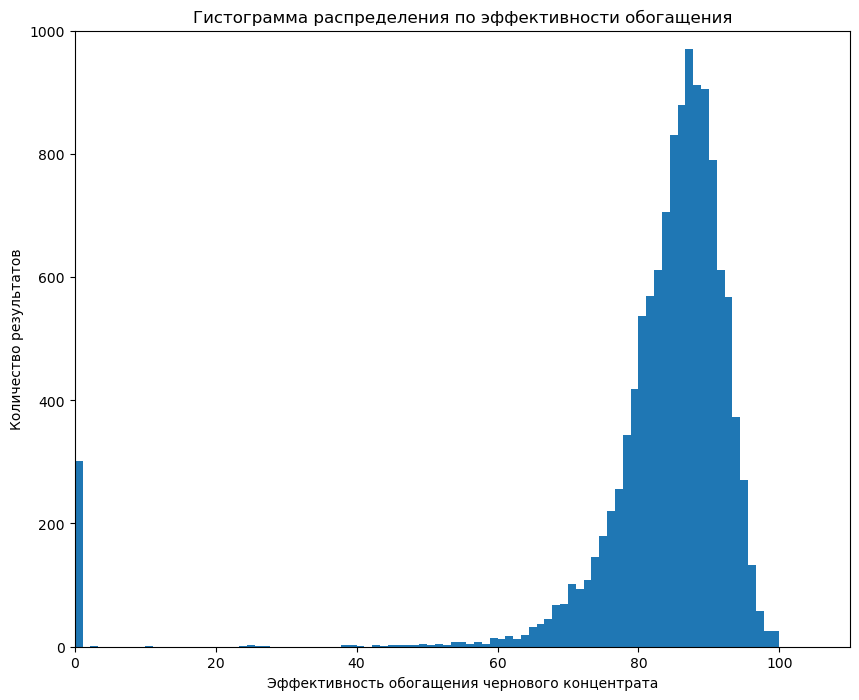

In [19]:
plt.figure(figsize=[10,8])

plt.hist(good_df_train['rougher.output.recovery'], bins=90)

plt.xlim([0, 110])
plt.ylim([0, 1000])

plt.xlabel('Эффективность обогащения чернового концентрата')
plt.ylabel('Количество результатов')

plt.title('Гистограмма распределения по эффективности обогащения')
plt.show()

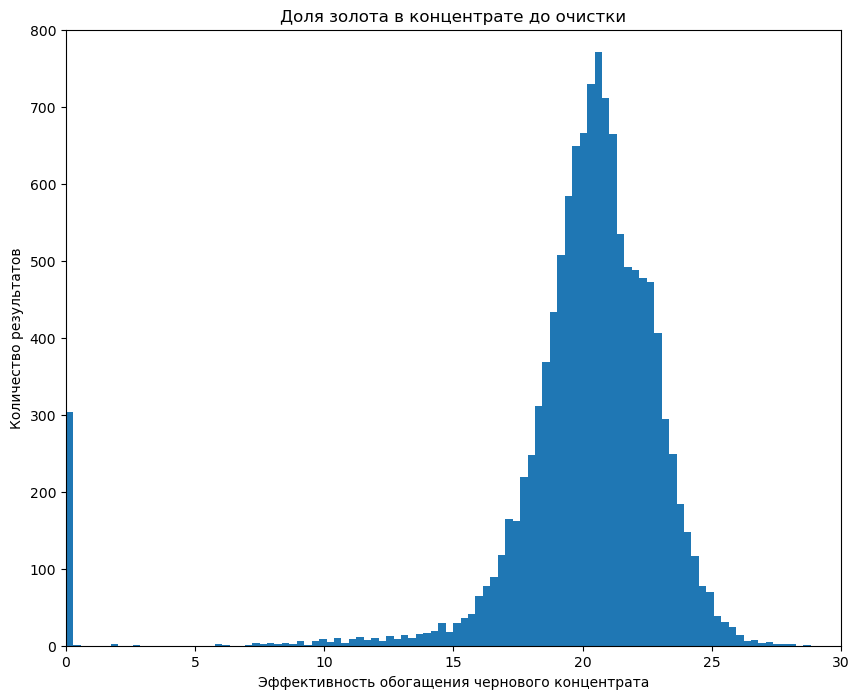

In [20]:
# Золото

plt.figure(figsize=[10,8])

plt.hist(good_df_train['rougher.output.concentrate_au'], bins=100)

plt.xlim([0, 30])
plt.ylim([0, 800])

plt.xlabel('Эффективность обогащения чернового концентрата')
plt.ylabel('Количество результатов')

plt.title('Доля золота в концентрате до очистки')
plt.show()

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Много нулевых значений, необходимо обратить внимание

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
good_df_train[good_df_train['rougher.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,-499.850895,1600.614880,-500.331775,1598.654561,-500.364377,1398.394100,-501.540155,1197.182011,-500.205806,1198.542180,-499.648335,13.311361,7.493738,41359.061159,3196.130244,3205.717062,2.530283,0.0,0.0,0.0,0.0,0.0,1.939811,4.784398,0.818965,20.046797,131.251366,13.969457,7.25,1.203034,1601.674776,-500.285160,1600.151967,-499.633542,1599.542959,-499.495721,1599.342687,-500.360306,37.633572,8.513177,9.724797,19.120964,3.434734,16.455383,3.366501,6.864404,25.963860,-498.097243,23.896954,-500.047419,24.963926,-500.207267,23.984937,-500.613261,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,3.102137,13.605154,4.983564,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,-500.082738,1599.408126,-500.189249,1598.918123,-498.775979,1398.97042

In [22]:
good_df_train[good_df_train['rougher.output.concentrate_au'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,-499.850895,1600.614880,-500.331775,1598.654561,-500.364377,1398.394100,-501.540155,1197.182011,-500.205806,1198.542180,-499.648335,13.311361,7.493738,41359.061159,3196.130244,3205.717062,2.530283,0.0,0.0,0.0,0.0,0.0,1.939811,4.784398,0.818965,20.046797,131.251366,13.969457,7.25,1.203034,1601.674776,-500.285160,1600.151967,-499.633542,1599.542959,-499.495721,1599.342687,-500.360306,37.633572,8.513177,9.724797,19.120964,3.434734,16.455383,3.366501,6.864404,25.963860,-498.097243,23.896954,-500.047419,24.963926,-500.207267,23.984937,-500.613261,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,3.102137,13.605154,4.983564,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,-500.082738,1599.408126,-500.189249,1598.918123,-498.775979,1398.97042

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Видим, что по столбцам где проходит этап rougher нет никаких данных, следовательно можем их удалить.

In [23]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)
good_df_train = good_df_train.drop(good_df_train[good_df_train['rougher.output.recovery'] == 0].index)
good_df_train[good_df_train['rougher.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,...,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


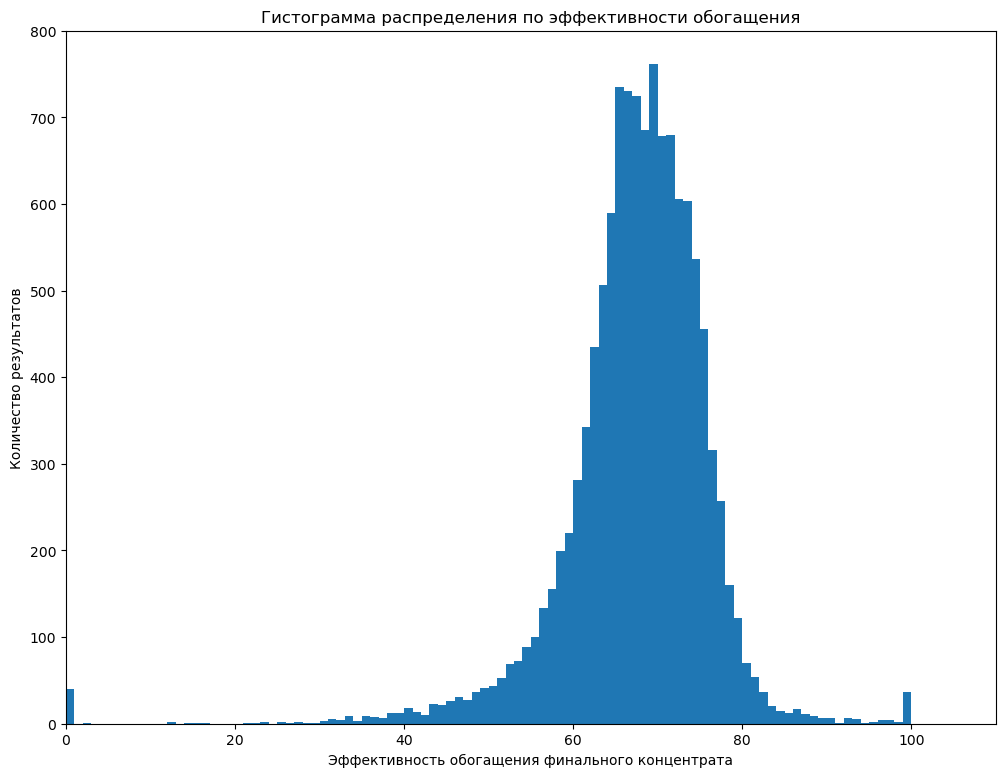

In [24]:
# гистограмма эффективности финального концентрата с обработанными данными

plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.recovery'], bins=100)

plt.xlim([0, 110])
plt.ylim([0, 800])

plt.xlabel('Эффективность обогащения финального концентрата')
plt.ylabel('Количество результатов')

plt.title('Гистограмма распределения по эффективности обогащения')
plt.show()

In [25]:
# снова видим нулевые занчнеия, рассмотрим их аналогичным образом и по возможности удалим
good_df_train[good_df_train['final.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,...,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
516,2016-02-08 00:00:00,5.598971,7.407737,1.934178,31.762853,500.087438,51.965198,...,0.0,0.0,0.0,1.779052,8.894029,0.843584,15.417342
943,2016-02-26 17:00:00,7.786147,8.098125,2.588661,34.896012,502.314489,49.985298,...,0.0,0.0,0.0,2.984504,10.817313,1.462800,16.407607
944,2016-02-26 18:00:00,7.499248,7.832467,2.435125,34.196525,501.677628,48.845911,...,0.0,0.0,0.0,2.747294,10.436792,1.207636,17.800392
945,2016-02-26 19:00:00,7.032278,7.600277,2.265148,31.994985,502.999469,47.430198,...,0.0,0.0,0.0,2.791440,10.637073,1.405778,17.195897
946,2016-02-26 20:00:00,7.021635,7.436860,2.265435,32.541806,501.128474,47.440433,...,0.0,0.0,0.0,2.682127,10.530320,1.461550,17.556860


In [26]:
# снова отсутсвуют данные в столбцах rougher, удаляем их

good_df_train = good_df_train.drop(good_df_train[good_df_train['final.output.recovery'] == 0].index)
good_df_train[good_df_train['final.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,...,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


In [27]:
# получили качественный df, который не содержит нулевые значения в важных для модели столбцах
good_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11996 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11996 non-null  object 
 1   rougher.input.feed_au                               11996 non-null  float64
 2   rougher.input.feed_ag                               11996 non-null  float64
 3   rougher.input.feed_pb                               11996 non-null  float64
 4   rougher.input.feed_sol                              11996 non-null  float64
 5   rougher.input.feed_rate                             11996 non-null  float64
 6   rougher.input.feed_size                             11996 non-null  float64
 7   rougher.input.floatbank10_sulfate                   11996 non-null  float64
 8   rougher.input.floatbank10_xanthate                  11996 non-null  float64


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>По итогу предобработки данных были обнаружены пропущенные значения и нулевые значения в самых важных столбцах. Были удалены значения, которые могли повлиять на работу модели (эти данные либо еще не занесли, либо еще не были получены).

## Анализ данных

### Расчет концентрации металлов на разных этапах

In [28]:
print('Концентрация до флотации')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(good_df_train['rougher.input.feed_ag'].mean(),
good_df_train['rougher.input.feed_pb'].mean(),
good_df_train['rougher.input.feed_au'].mean()))
print()
print('Концентрация после флотации')
print('Коцентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(good_df_train['rougher.output.concentrate_ag'].mean(),
good_df_train['rougher.output.concentrate_pb'].mean(),
good_df_train['rougher.output.concentrate_au'].mean()))
print()
print('Концентрация после первичной очистки')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(good_df_train['primary_cleaner.output.concentrate_ag'].mean(),
good_df_train['primary_cleaner.output.concentrate_pb'].mean(),
good_df_train['primary_cleaner.output.concentrate_au'].mean()))
print()
print('Концентрация поле вторичной очистки')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(good_df_train['final.output.concentrate_ag'].mean(),
good_df_train['final.output.concentrate_pb'].mean(),
good_df_train['final.output.concentrate_au'].mean()))

Концентрация до флотации
Концентрация Серебра: 8.99, Свинца: 3.64, Золота: 8.52

Концентрация после флотации
Коцентрация Серебра: 12.31, Свинца: 7.70, Золота: 20.45

Концентрация после первичной очистки
Концентрация Серебра: 8.67, Свинца: 9.85, Золота: 31.97

Концентрация поле вторичной очистки
Концентрация Серебра: 5.21, Свинца: 10.03, Золота: 44.38


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>C каждым этапом увеличивается концентрация золота и свинца, концентрации серебра снижается

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Построим гистограммы, чтобы посмотреть на концентрацию металлов на каждом этапе

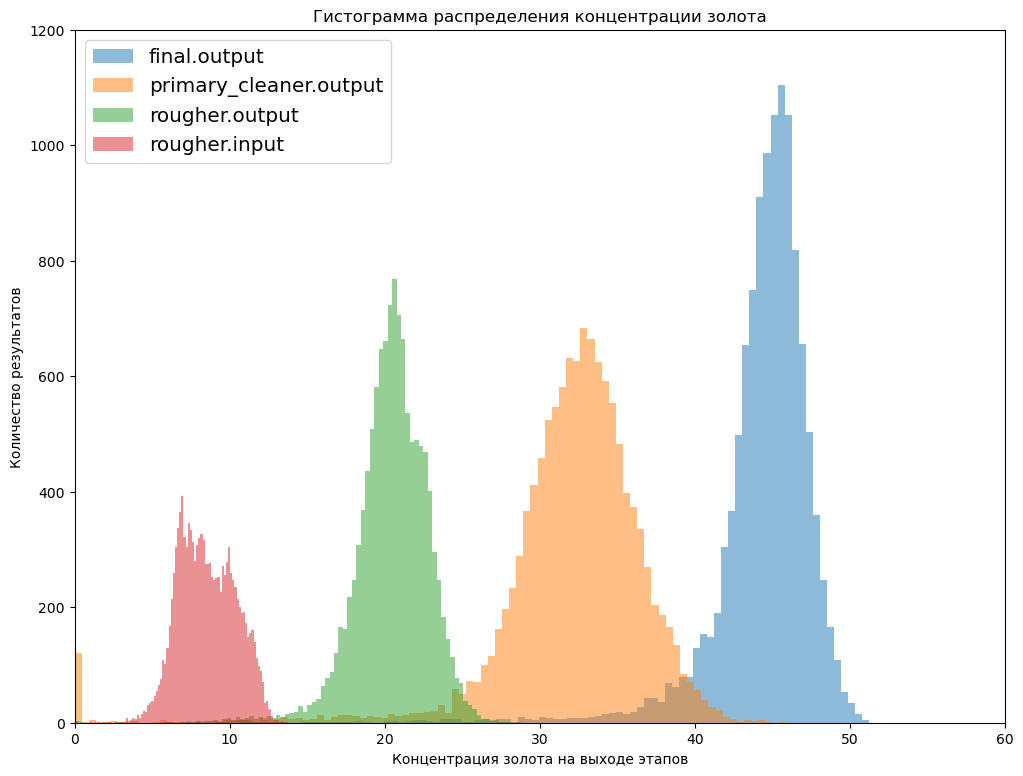

In [29]:
# золото

plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(good_df_train['rougher.input.feed_au'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 60])
plt.ylim([0, 1200])

plt.xlabel('Концентрация золота на выходе этапов')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации золота')
plt.show()

</font><font color='Black'><b>На гистограмме видим что концентарция золота повышается с каждым этапом. Работает процесс флотации.

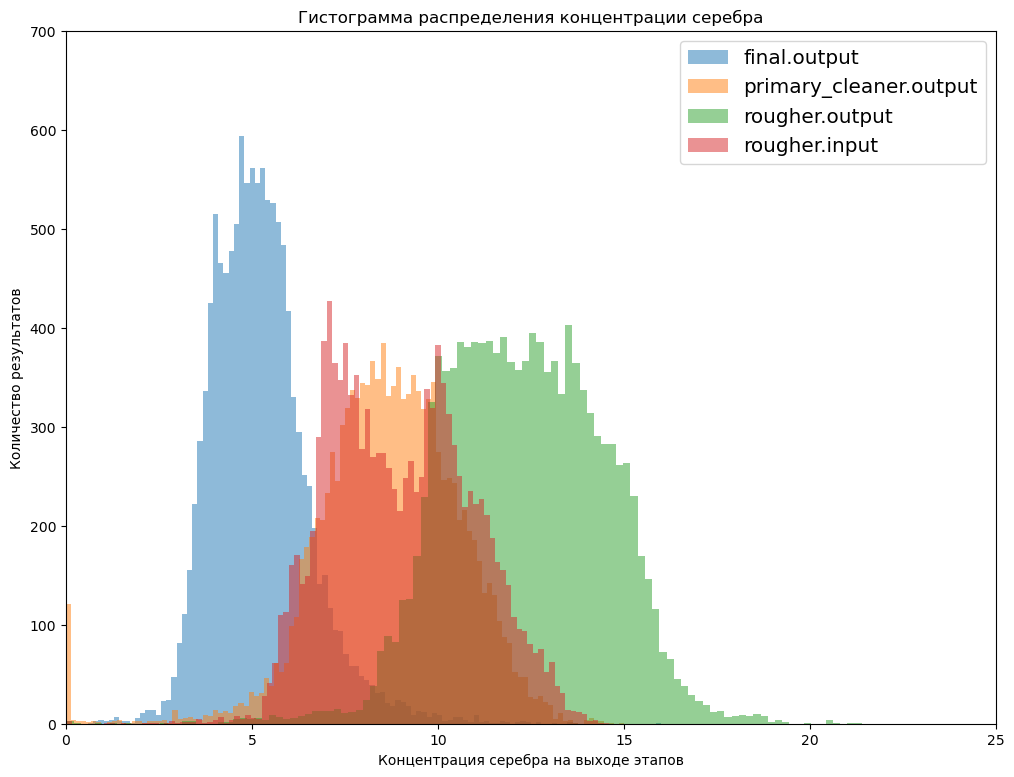

In [30]:
# серебро

plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.concentrate_ag'], bins=110, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_ag'], bins=110, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_ag'], bins=110, label = 'rougher.output', alpha=.5)
plt.hist(good_df_train['rougher.input.feed_ag'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 700])

plt.xlabel('Концентрация серебра на выходе этапов')
plt.ylabel("Количество результатов")

plt.legend(loc='upper right', fontsize='x-large')

plt.title('Гистограмма распределения концентрации серебра')
plt.show()

</font><font color='Black'><b>Концентрация серебра наоборот понижается

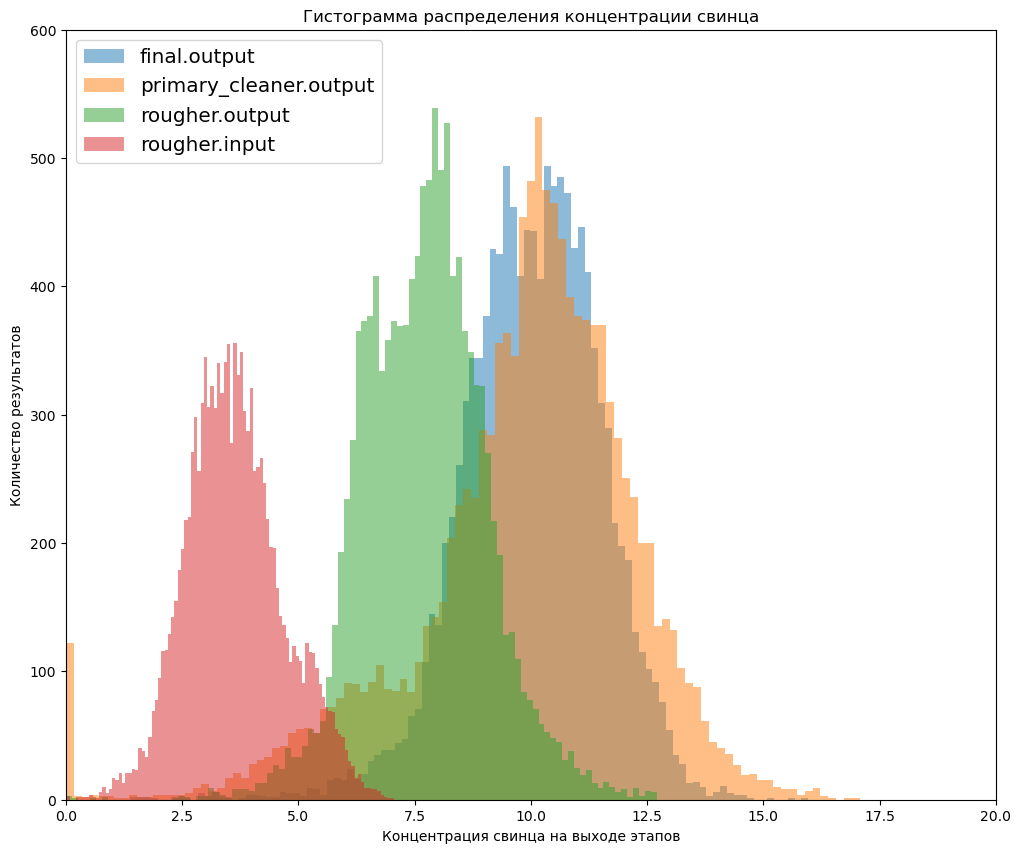

In [31]:
# свинец

plt.figure(figsize=[12,10])

plt.hist(good_df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(good_df_train['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel('Концентрация свинца на выходе этапов')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации свинца')
plt.show()

In [32]:
# подсчет кол-ва выбросов

print('Кол-во выбросов - золото:', good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] < 1] \
      ['primary_cleaner.output.concentrate_au'].count())
print('Кол-во выбросов - серебро:', good_df_train[good_df_train['primary_cleaner.output.concentrate_ag'] < 1] \
      ['primary_cleaner.output.concentrate_ag'].count())
print('Кол-во выбросов - свинец:', good_df_train[good_df_train['primary_cleaner.output.concentrate_pb'] < 1] \
      ['primary_cleaner.output.concentrate_pb'].count())

Кол-во выбросов - золото: 124
Кол-во выбросов - серебро: 138
Кол-во выбросов - свинец: 137


In [33]:
pd.set_option('display.max_columns', None)
good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] < 1]

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
14,2016-01-15 14:00:00,6.801254,6.046063,2.777324,40.381002,571.766992,62.823127,14.812266,7.064468,999.708593,-400.075046,1600.639292,-450.110961,1602.333794,-450.673170,1600.427078,-449.633484,1401.859581,-448.145152,1400.906088,-451.771497,14.814722,7.064408,41959.818540,3507.941540,3499.552368,2.448851,18.511902,10.788951,7.537074,26.092838,86.241795,1.369732,4.919573,0.739863,20.309714,149.998260,12.509947,7.250000,0.997030,1599.617983,-499.527131,1599.389604,-499.554869,1600.441370,-500.503609,1601.900702,-500.129123,0.00,0.00,0.00,0.00,2.013487,14.915949,2.702527,7.784534,25.999540,-500.152462,24.013000,-500.297031,24.022240,-499.329964,24.012891,-499.923981,14.001632,-509.808331,12.087669,-510.782166,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,2.138772,12.708557,4.565723,9.997717,42.509402,5.658943,10.436002,5.942418,70.348300,2.272460,10.232392,1.174845,19.498566
17,2016-01-15 17:00:00,6.610732,5.599324,2.525838,41.302359,571.140653,64.816398,14.501843,7.301759,1000.107388,-399.263233,1599.780054,-449.883122,1597.621485,-450.0

In [34]:
# удаление

pd.set_option('display.max_columns', 10)
good_df_train = good_df_train.drop(good_df_train[good_df_train['primary_cleaner.output.concentrate_pb'] < 1].index)
good_df_train[good_df_train['primary_cleaner.output.concentrate_pb'] == 0].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,...,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


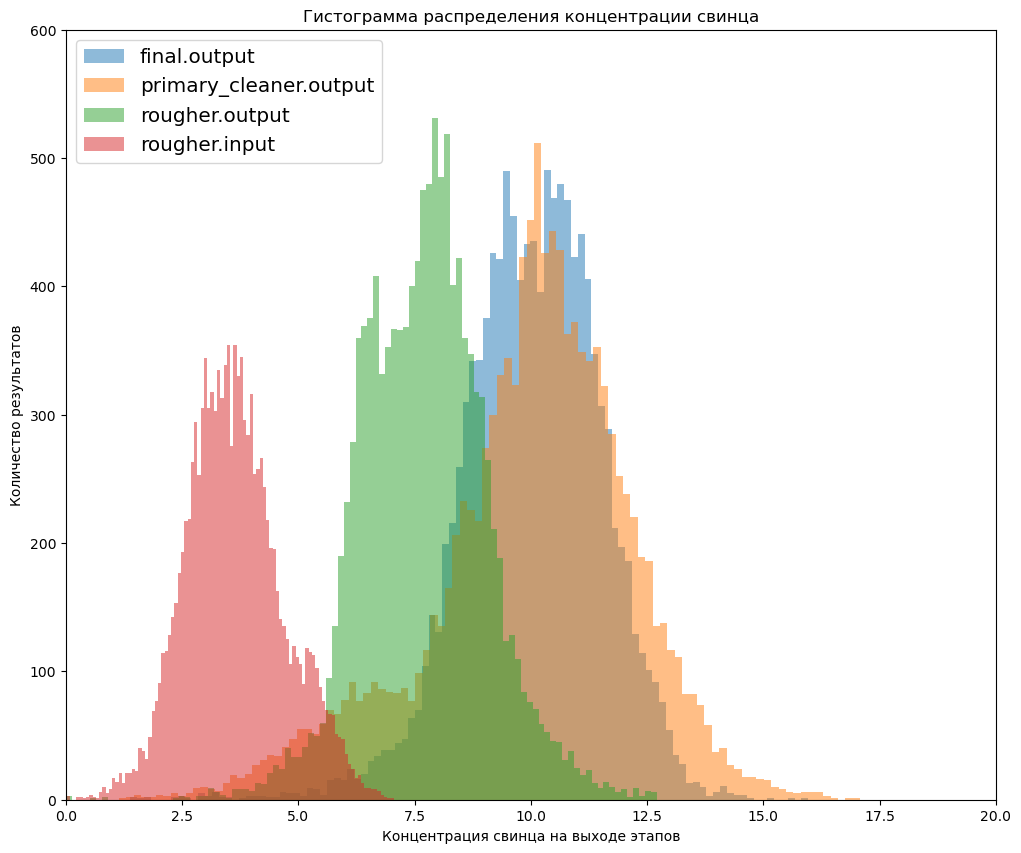

In [35]:
# свинец

plt.figure(figsize=[12,10])

plt.hist(good_df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)
plt.hist(good_df_train['rougher.input.feed_pb'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel('Концентрация свинца на выходе этапов')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации свинца')
plt.show()

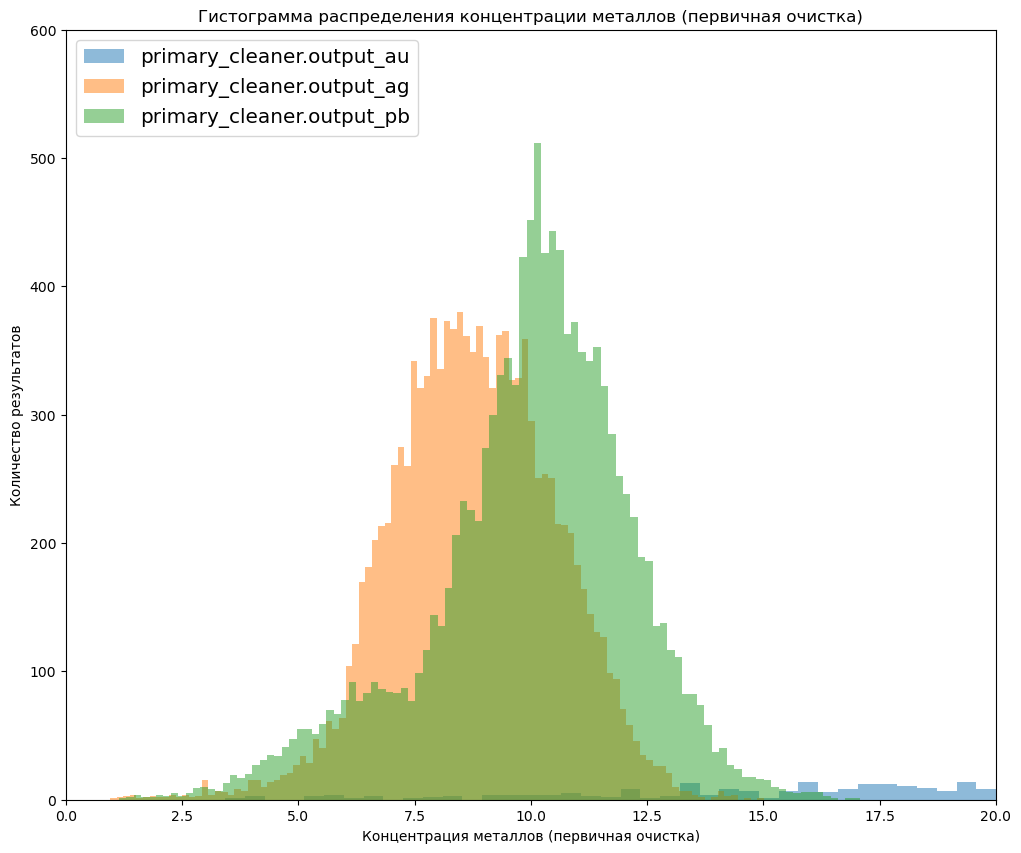

In [36]:
# ПРОВЕРКА

plt.figure(figsize=[12,10])

plt.hist(good_df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output_au', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output_ag', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output_pb', alpha=.5)
#plt.hist(good_df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'rougher.input', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel('Концентрация металлов (первичная очистка)')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентрации металлов (первичная очистка)')
plt.show()

### Распределение размеров гранул сырья на test и train

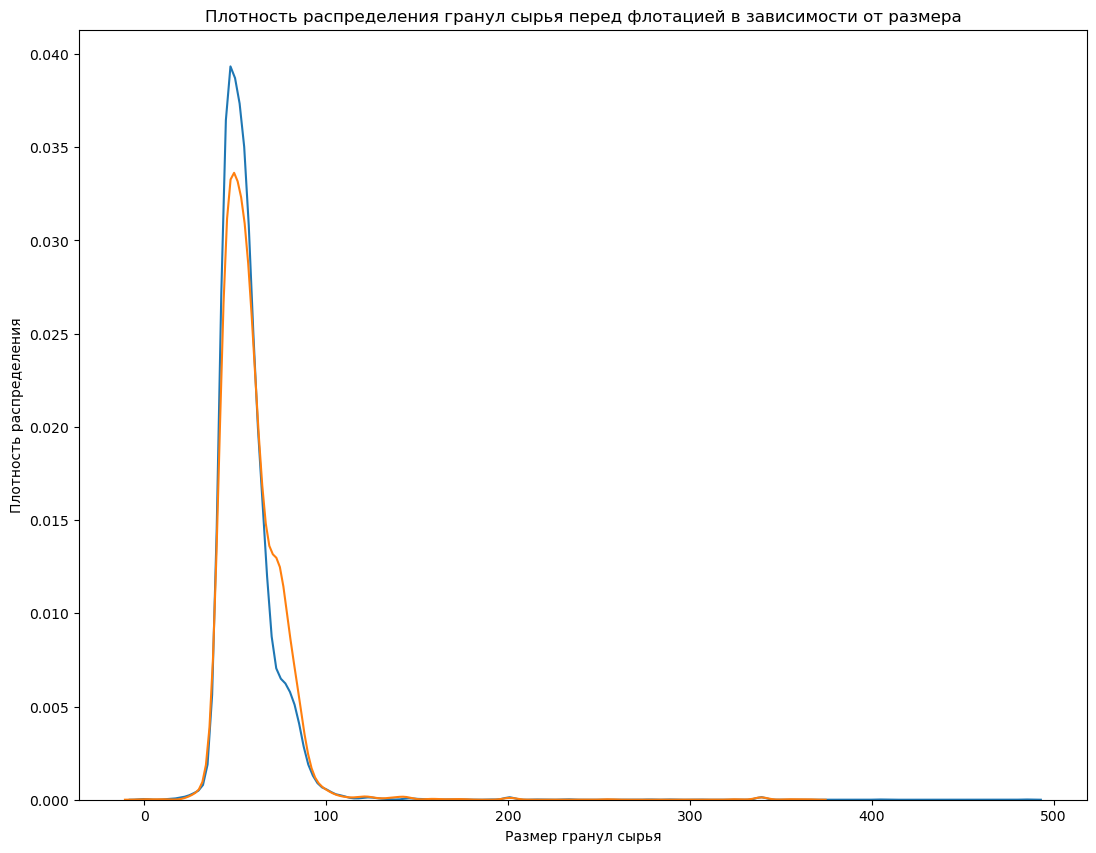

In [37]:
plt.figure(figsize=[13,10])

sns.kdeplot(good_df_train['rougher.input.feed_size'])
sns.kdeplot(good_df_test['rougher.input.feed_size'])

plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')

plt.title('Плотность распределения гранул сырья перед флотацией в зависимости от размера');

### Исследование суммарной концентрации металлов на разных стадиях

In [38]:
final_output_concentrate_sum_train = (good_df_train['final.output.concentrate_au'] + 
                                      good_df_train['final.output.concentrate_ag'] + 
                                      good_df_train['final.output.concentrate_pb'] +
                                      good_df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (good_df_train['primary_cleaner.output.concentrate_au'] + 
                                                good_df_train['primary_cleaner.output.concentrate_ag'] + 
                                                good_df_train['primary_cleaner.output.concentrate_pb'] +
                                                good_df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (good_df_train['rougher.output.concentrate_au'] + 
                                        good_df_train['rougher.output.concentrate_ag'] + 
                                        good_df_train['rougher.output.concentrate_pb'] +
                                        good_df_train['rougher.output.concentrate_sol'])



sum_rougher_input_concentrate_train = (good_df_train['rougher.input.feed_au'] + 
                                       good_df_train['rougher.input.feed_ag'] + 
                                       good_df_train['rougher.input.feed_pb'] +
                                       good_df_train['rougher.input.feed_sol'])

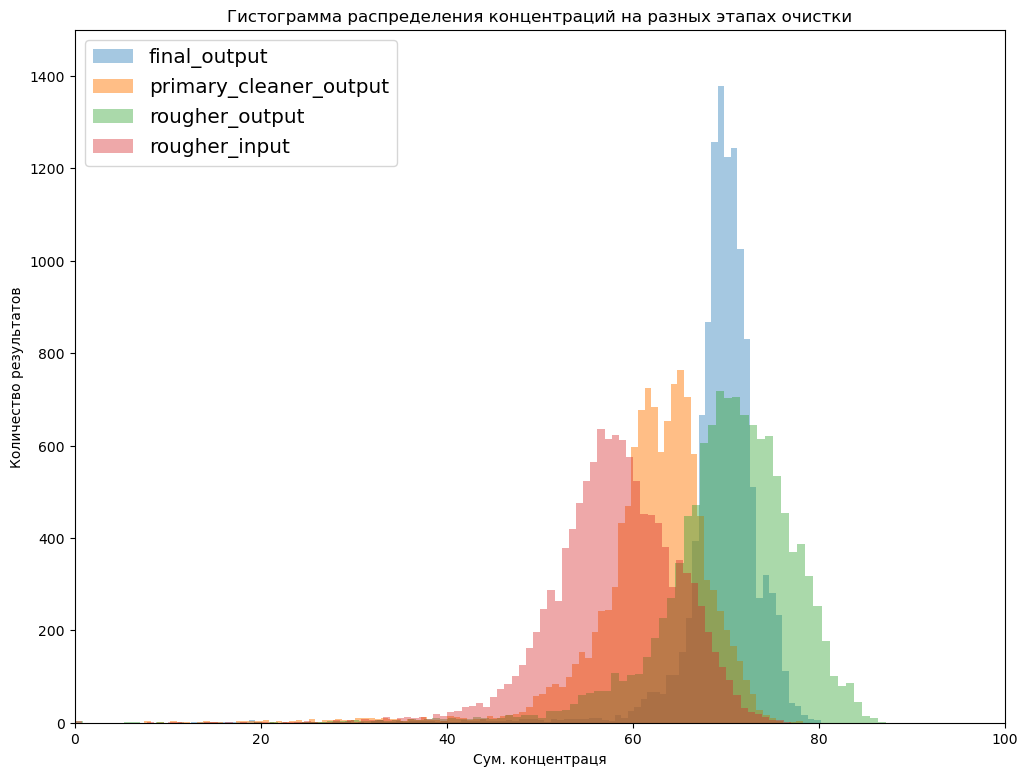

In [39]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)
plt.hist(sum_rougher_input_concentrate_train, bins=100, label = 'rougher_input', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel('Сум. концентраця')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Гистограмма распределения концентраций на разных этапах очистки')
plt.show()

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>В результате анализа были изучены: концентрация металлов (Au, Ag, Pb) на разных этапах очистки, размер гранул сырья на обучающей и тестовой выборках, суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах, найдены и обработаны аномалии. Данные готовы к обучению.

## Модель

### Функция для sMAPE

In [40]:
def sMAPE(y_true, y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [41]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [42]:
# подготовка признаков для final.output.recovery

columns_to_delete = set(good_df_train.columns) - final_features_columns
print(columns_to_delete)
train_features_dataset_final = good_df_train.drop(columns_to_delete, axis=1)
print('')
print(train_features_dataset_final.columns)

# подготовка признаков для rougher.output.recovery

columns_to_delete = set(train_features_dataset_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_dataset_rougher = train_features_dataset_final.drop(columns_to_delete, axis=1)
print('')
print(train_features_dataset_rougher.columns)

{'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_sol', 'final.output.tail_pb', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'final.output.tail_au', 'final.output.recovery', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_pb', 'date', 'rougher.calculation.au_pb_ratio', 'final.output.tail_ag', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.o

In [43]:
train_target_dataset_rougher = good_df_train['rougher.output.recovery']
train_target_dataset_final = good_df_train['final.output.recovery']

In [44]:
test_features = good_df_test.drop('date', axis=1)

In [45]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

In [46]:
test_features_rougher.shape

(4537, 22)

In [47]:
# счетчик функции

custom_score = make_scorer(sMAPE,greater_is_better=False)

In [48]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=111))
model2 = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=111))

In [49]:
# инициализация параметров для GridSearchCV

params_RF = {'randomforestregressor__n_estimators': range(100, 200, 10), 'randomforestregressor__max_depth': range(2, 7, 1)}
params_DT = {'decisiontreeregressor__max_depth': range(2, 7, 1)}

In [50]:
grid_rougher = GridSearchCV(model, param_grid = params_RF, scoring=custom_score, n_jobs=-1, verbose=10, cv=3)
grid_final = GridSearchCV(model, param_grid = params_RF, scoring=custom_score, n_jobs=-1, verbose=10, cv=3)
grid_rougher_DT = GridSearchCV(model2, param_grid = params_DT, scoring=custom_score, n_jobs=-1, verbose=10, cv=3)
grid_final_DT = GridSearchCV(model2, param_grid = params_DT, scoring=custom_score, n_jobs=-1, verbose=10, cv=3)

### Обучение моделей

In [51]:
grid_rougher.fit(train_features_dataset_rougher, train_target_dataset_rougher)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=111))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(2, 7),
                         'randomforestregressor__n_estimators': range(100, 200, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [52]:
grid_final.fit(train_features_dataset_final, train_target_dataset_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=111))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(2, 7),
                         'randomforestregressor__n_estimators': range(100, 200, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [53]:
grid_rougher_DT.fit(train_features_dataset_rougher, train_target_dataset_rougher)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=111))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': range(2, 7)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [54]:
grid_final_DT.fit(train_features_dataset_final, train_target_dataset_final)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=111))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': range(2, 7)},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=10)

In [55]:
print('Лучшие модели')
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, n_estimators=150,
                                       random_state=111))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, n_estimators=150,
                                       random_state=111))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=2, random_state=111))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=2, random_state=111))])


In [56]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

In [57]:
# определяем лучшую модель для каждого целевого признака

print('rougher')
print('RandomForest:', -best_score_rougher)
print('DecisionTree:', -best_score_rougher_DT)
print('')
print('final')
print('RandomForest:', -best_score_final)
print('DecisionTree:', -best_score_final_DT)

rougher
RandomForest: 6.201939986877366
DecisionTree: 6.256066146854244

final
RandomForest: 8.641849516378493
DecisionTree: 8.901111369959217


</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Лучшая модель - RandomForest

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>лучшие результаты на тренировочной выборке

In [58]:
# финальный sMAPE RandomForest
-final_sMAPE(best_score_rougher, best_score_final)

8.03187213400321

In [59]:
# финальный sMAPE DecisionTree
-final_sMAPE(best_score_rougher_DT, best_score_final_DT)

8.239850064182974

In [60]:
test_frame_for_target = good_df_test.merge(df_full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']],
                                           on = 'date')

In [61]:
target_test_rougher = test_frame_for_target['rougher.output.recovery']
target_test_final = test_frame_for_target['final.output.recovery']

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Наименьшую ошибку мы получили при использовании RandomForest

In [62]:
rougher_test = grid_rougher.predict(test_features_rougher)

In [63]:
final_test = grid_final.predict(test_features_final)

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Финальная ошибка на тестовой выборке

In [64]:
final_sMAPE(sMAPE(target_test_rougher, rougher_test), sMAPE(target_test_final, final_test))

7.406326967770219

</font><font color='Black'><b>Пояснение</b></font><br>
<font color='Black'>Сравнение с константной моделью

In [65]:
base = DummyRegressor(strategy='median')
base_final = DummyRegressor(strategy='median')

In [66]:
base.fit(train_features_dataset_rougher,train_target_dataset_rougher)
base_final.fit(train_features_dataset_final,train_target_dataset_final)

DummyRegressor(strategy='median')

In [67]:
base_rougher = base.predict(test_features_final)
base_final_pred = base_final.predict(test_features_final)

In [68]:
final_sMAPE(sMAPE(target_test_rougher, base_rougher), sMAPE(target_test_final, base_final_pred))

8.17334625575096

</font><font color='Black'><b>Промежуточный вывод</b></font><br>
<font color='Black'>Ошибка на тесте приемлемая, так как она меньше чем на константном модели

## Вывод

Итоговая модель построена на алгоритме RandomForest;
<br>Ошибка на тестовой выборке: 7.57;
<br>Параметры алгоритма: { max_depth: 2};
<br>Параметр recovery в тренировочной выборке был рассчитан верно;
<br>Изначально, в тестовой выборке отсутствует 34 признака.